In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Data Preparation

In [2]:
# Load dataframes from pickle files
with open('../data/data_full.pkl', 'rb') as f:
    data, data_norm = pickle.load(f)

## Point Anomaly Detection

In [7]:
def is_outlier(data, rolling_median, thresh):
    return abs(data - rolling_median) >= thresh

In [10]:
# Label the outliers
data_nrm5 = data_norm.rolling(5, center=True).median()
labels = is_outlier(data_norm, data_nrm5, 0.17).astype('int')

## Visualization

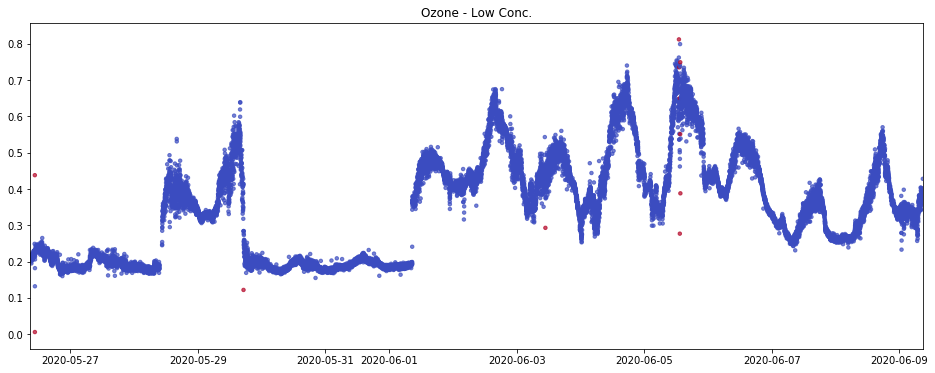

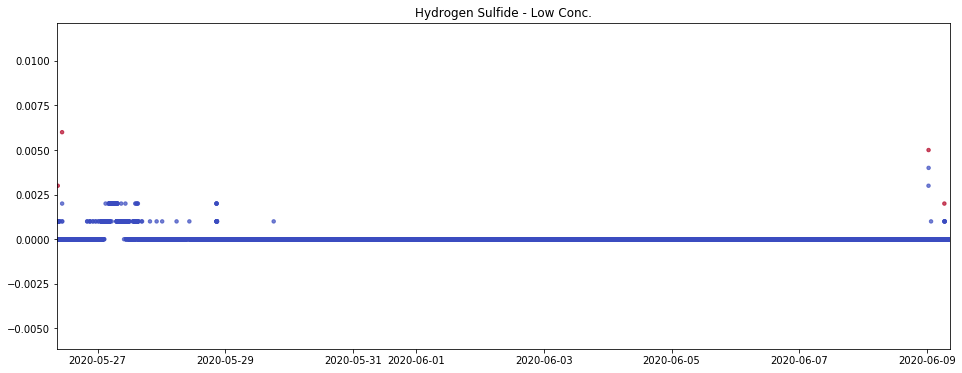

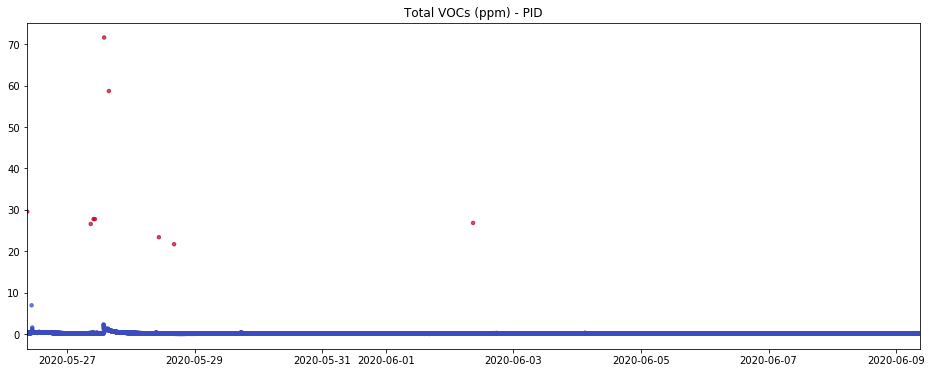

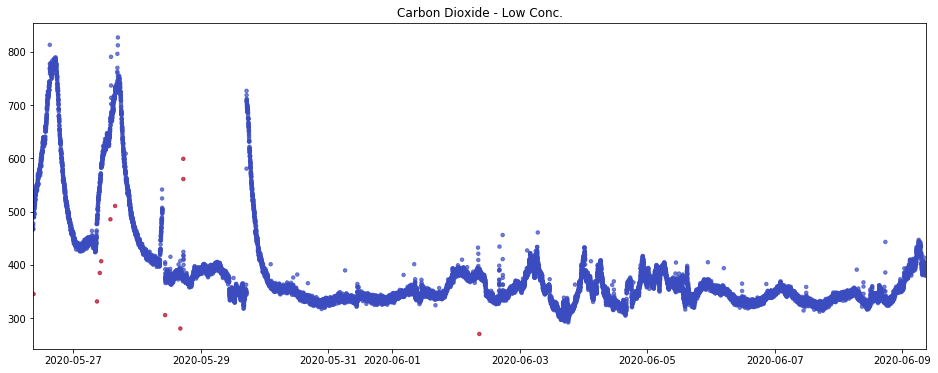

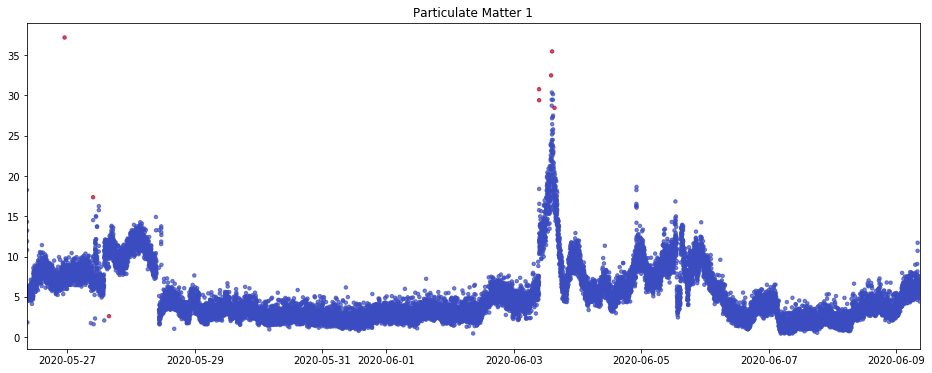

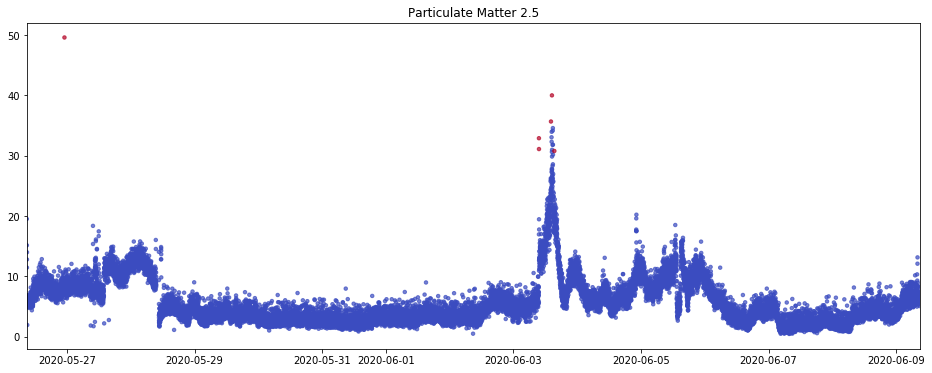

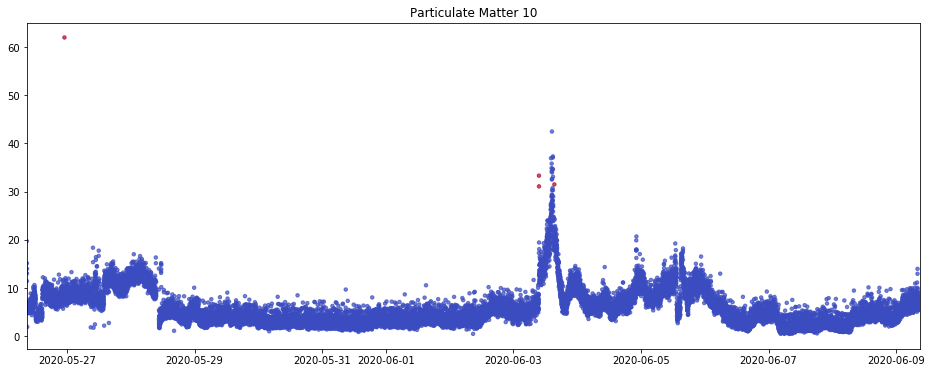

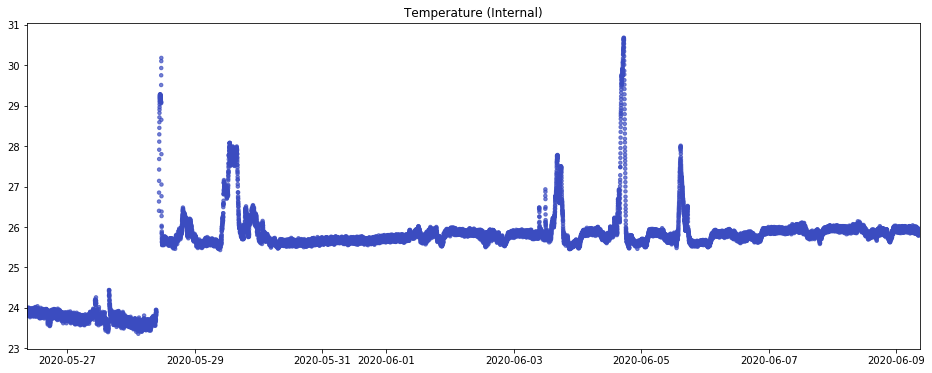

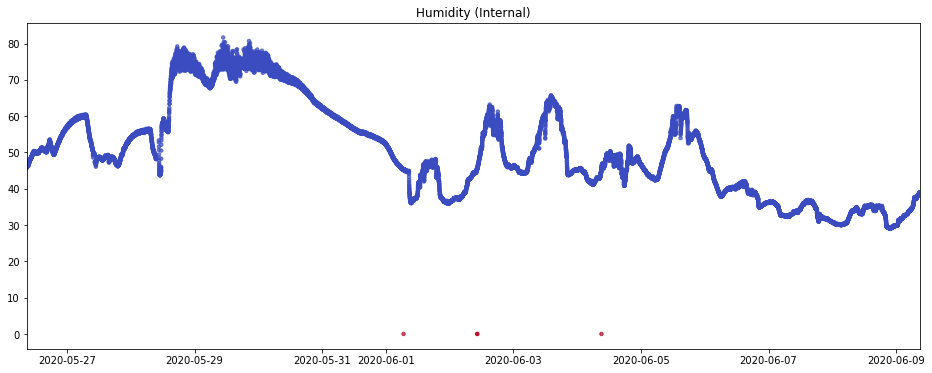

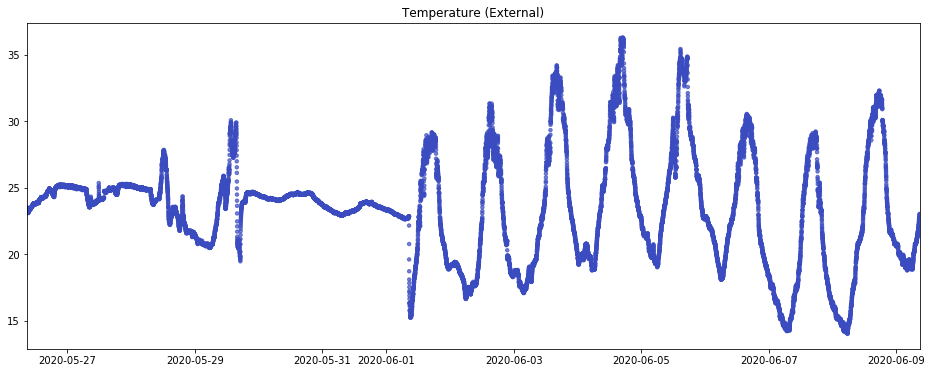

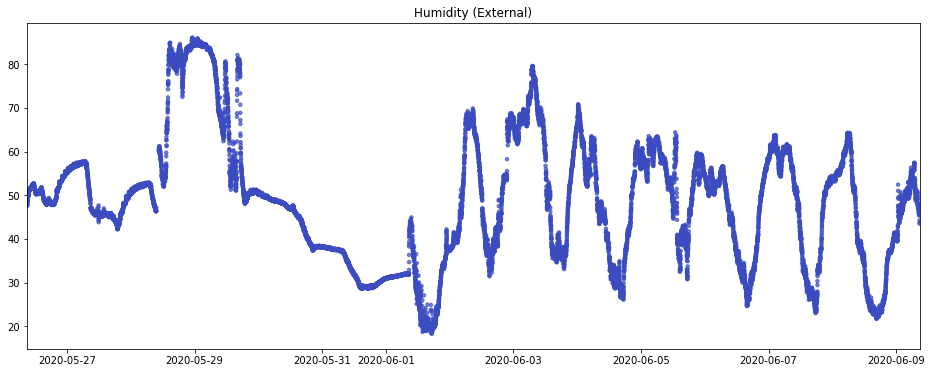

In [112]:
# Plot each of the time series data with outliers labeled
for col in data.columns:
    fig, ax = plt.subplots(figsize=(16, 6))
    plt.scatter(data.index, data[col], c=labels[col], s=12, alpha=0.7, cmap=plt.get_cmap('coolwarm'))
    plt.xlim([data.index[0], data.index[-1]])
    plt.title(col)
plt.show()

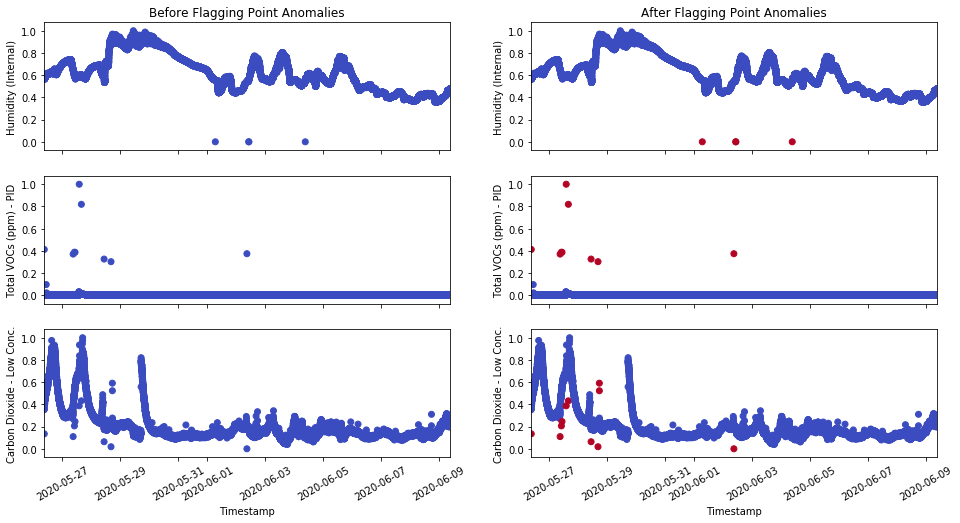

In [119]:
# Comparison of selected time series
tick = ax.get_xticklabels()
ind = [8, 2, 3]
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 8))
axs[0][0].set_title('Before Flagging Point Anomalies')
axs[0][1].set_title('After Flagging Point Anomalies')
for i in range(3):
    series, label = data_norm.iloc[:, ind[i]], labels.iloc[:, ind[i]]
    c = [np.zeros(len(series)), label]
    for j in range(2):
        ax = axs[i][j]
        ax.scatter(series.index, series, c=c[j], cmap=plt.get_cmap('coolwarm'))
        ax.set_xlim(series.index[0], series.index[-1])
        ax.set_ylabel(data_norm.columns[ind[i]])
for j in range(2):
    ax = axs[2][j]
    ax.set_xticklabels(tick, rotation=30)
    ax.set_xlabel('Timestamp')
plt.show()

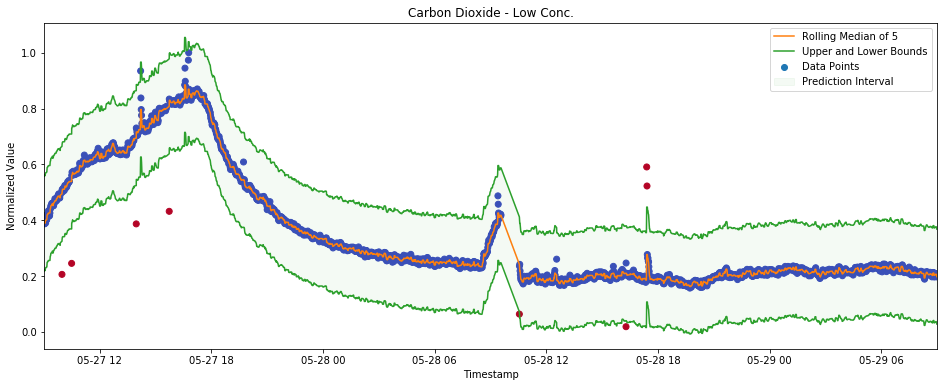

In [137]:
# Zoomed-in scatter plot of Carbon Dioxide, with labeled outliers and prediction interval
t = ['2020-05-27 09:00:00-04:00', '2020-05-29 9:00:00-04:00']
series = data_norm['Carbon Dioxide - Low Conc.']
series = series.loc[(series.index > t[0]) & (series.index < t[1])]
label = labels['Carbon Dioxide - Low Conc.']
label = label.loc[(label.index > t[0]) & (label.index < t[1])]
series_nrm5 = data_nrm5['Carbon Dioxide - Low Conc.']
series_nrm5 = series_nrm5.loc[(series_nrm5.index > t[0]) & (series_nrm5.index < t[1])]
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(series.index, series, c=label, cmap=plt.get_cmap('coolwarm'), label='Data Points')
plt.plot(series_nrm5.index, series_nrm5, color='tab:orange', label='Rolling Median of 5')
plt.plot(series_nrm5.index, series_nrm5+0.17, color='tab:green', label='Upper and Lower Bounds')
plt.plot(series_nrm5.index, series_nrm5-0.17, color='tab:green')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5+0.17, color='tab:green', alpha=0.05, label='Prediction Interval')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5-0.17, color='tab:green', alpha=0.05)
plt.xlim(series.index[0], series.index[-1])
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Carbon Dioxide - Low Conc.')
plt.show()